## CV_Assignment_9
1. What are the advantages of a CNN for image classification over a completely linked DNN?
2. Consider a CNN with three convolutional layers, each of which has three kernels, a stride of two, and SAME padding. The bottom layer generates 100 function maps, the middle layer 200, and the top layer 400. RGB images with a size of 200 x 300 pixels are used as input. How many criteria does the CNN have in total? How much RAM would this network need when making a single instance prediction if we're using 32-bit floats? What if you were to practice on a batch of 50 images?
3. What are five things you might do to fix the problem if your GPU runs out of memory while training a CNN?
4. Why would you use a max pooling layer instead with a convolutional layer of the same stride?
5. When would a local response normalization layer be useful?
6. In comparison to LeNet-5, what are the main innovations in AlexNet? What about GoogLeNet and ResNet's core innovations?
7. On MNIST, build your own CNN and strive to achieve the best possible accuracy.

8. Using Inception v3 to classify broad images.

    a. Images of different animals can be downloaded. Load them in Python using the matplotlib.image.mpimg.imread() or scipy.misc.imread() functions, for example. Resize and/or crop them to 299 x 299 pixels, and make sure they only have three channels (RGB) and no transparency. The photos used to train the Inception model were preprocessed to have values ranging from -1.0 to 1.0, so make sure yours do as well.   
    
9. Large-scale image recognition using transfer learning.
   
   a. Make a training set of at least 100 images for each class. You might, for example, identify your own photos based on their position (beach, mountain, area, etc.) or use an existing dataset, such as the flowers dataset or MIT's places dataset (requires registration, and it is huge).
    
    b. Create a preprocessing phase that resizes and crops the image to 299 x 299 pixels while also adding some randomness for data augmentation.
   
   c. Using the previously trained Inception v3 model, freeze all layers up to the bottleneck layer (the last layer before output layer) and replace output layer with  appropriate number of outputs for your new classification task (e.g., the flowers dataset has five mutually exclusive classes so the output layer must have five neurons and use softmax activation function).
    
    d. Separate the data into two sets: a training and a test set. The training set is used to train the model, and the test set is used to evaluate it.

In [3]:
'''Ans 1:- Convolutional Neural Networks (CNNs) outperform completely
linked Deep Neural Networks (DNNs) in image classification for
several reasons. CNNs are specifically designed to handle
grid-like data, such as images, more effectively. They employ
convolutional layers to automatically learn hierarchical features,
enabling the network to recognize patterns with varying scales and
complexities. Unlike DNNs, CNNs preserve spatial relationships through
local receptive fields and weight sharing, reducing the number
of parameters to learn. This reduces the risk of overfitting,
making CNNs more robust with less labeled data. Additionally,
CNNs can exploit translational invariance, crucial in image
analysis. Overall, CNNs are tailored to the unique characteristics
of images, making them superior choices for image-related
tasks compared to fully connected DNNs.'''

X_train shape: (20, 224, 224, 3)
y_train shape: (20, 3)


In [ ]:
'''Ans 2:- Number of Parameters = (Kernel Size) x (Kernel Size) x
(Number of Input Channels) x (Number of Output Channels)

Let's calculate the number of parameters for each convolutional layer:-

1. Bottom Layer:
Kernel Size = 3x3
Number of Input Channels = 3 (RGB images)
Number of Output Channels = 100
Number of Parameters = 3x3x3x100 = 2700 parameters

2. Middle Layer:
Kernel Size = 3x3
Number of Input Channels = 100 (output channels from the bottom layer)
Number of Output Channels = 200
Number of Parameters = 3x3x100x200 = 180,000 parameters

3. Top Layer:
Kernel Size = 3x3
Number of Input Channels = 200 (output channels from the middle layer)
Number of Output Channels = 400
Number of Parameters = 3x3x200x400 = 720,000 parameters

Now, let's calculate the RAM requirements for a single
instance prediction and for a batch of 50 images using 32-bit
floats (4 bytes per parameter):

4. For a single instance prediction:
Total Parameters = 2700 + 180,000 + 720,000 = 902,700 parameters
RAM Required = 902,700 parameters x 4 bytes/parameter = 3,610,800
bytes or approximately 3.45 MB 

5. For a batch of 50 images:
RAM Required = 3,610,800 bytes (per instance) x 50 instances = 180,540,000 
bytes or approximately 172.3 MB

So, the CNN would need approximately 3.45 MB of RAM for a
single instance prediction and approximately 172.3 MB of RAM when
processing a batch of 50 images, assuming the use of 32-bit floats
for parameter storage.'''

In [ ]:
'''Ans 3:- To address GPU memory issues during CNN training:-

1. Reduce Batch Size: Decrease the batch size to reduce memory
consumption per batch. 

2. Use Smaller Models: Employ models with fewer layers or parameters. 

3. Gradient Accumulation: Accumulate gradients over multiple
mini-batches. 

4. Data Augmentation: Apply on-the-fly data augmentation
to reduce memory usage.

5. Mixed Precision Training: Utilize mixed-precision training,
which uses 16-bit precision for weights to reduce memory requirements.'''

In [4]:
'''Ans 4:- Using a max pooling layer alongside a convolutional layer
with the same stride helps improve translation invariance and
reduces computational load. Max pooling selects the maximum value
from a local region, capturing the most salient features while
downsampling the feature map. This reduces spatial dimensions, making
the model computationally efficient and enhancing its ability
to focus on essential features, aiding generalization in
tasks like image classification.'''

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# small sample dataset
num_samples = 100
image_size = (28, 28, 1)
num_classes = 10

# Create random images and labels for the dataset
X_train = np.random.rand(num_samples, *image_size)
y_train = np.random.randint(num_classes, size=num_samples)
y_train = to_categorical(y_train, num_classes=num_classes)

# Create a simple CNN model with a max pooling layer
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the small sample dataset
model.fit(X_train, y_train, epochs=5, batch_size=32)
model.summary()

Epoch 1/5
4/4 [==============================] - 1s 21ms/step - loss: 2.5063 - accuracy: 0.0400
Epoch 2/5
4/4 [==============================] - 0s 17ms/step - loss: 2.2985 - accuracy: 0.1700
Epoch 3/5
4/4 [==============================] - 0s 19ms/step - loss: 2.2785 - accuracy: 0.2400
Epoch 4/5
4/4 [==============================] - 0s 22ms/step - loss: 2.2432 - accuracy: 0.1100
Epoch 5/5
4/4 [==============================] - 0s 19ms/step - loss: 2.1928 - accuracy: 0.1400
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 54

In [ ]:
'''Ans 5:- A local response normalization (LRN) layer is useful when
training deep convolutional neural networks (CNNs) to enhance the
model's ability to recognize local patterns and features. LRN
promotes competition among neighboring neurons, making them more
sensitive to local contrast and helping the model focus on
distinguishing fine-scale details in images. It was especially beneficial
in early CNN architectures like AlexNet, but it has been
largely replaced by batch normalization in modern networks.'''

In [ ]:
'''Ans 6:- AlexNet introduced several innovations compared to LeNet-5:-

1. Deeper Architecture: AlexNet had more layers, making it deeper.
2. ReLU Activation: It used Rectified Linear Units (ReLU) for faster training.
3. Dropout: Employed dropout to reduce overfitting.
4. Data Augmentation: Utilized data augmentation for better generalization.
5. Parallelization: Trained on two GPUs simultaneously.

GoogLeNet's core innovation was the introduction of
Inception modules, enabling the network to capture multi-scale
features efficiently.  ResNet's core innovation was the
incorporation of skip connections or residual connections, allowing very
deep networks to be trained effectively by mitigating vanishing
gradient issues and enabling the training of extremely deep
networks (100+ layers).'''

Epoch 1/10
156/156 [==============================] - 3s 17ms/step - loss: 1.5869 - accuracy: 0.4684 - val_loss: 0.6044 - val_accuracy: 0.8408
Epoch 2/10
156/156 [==============================] - 2s 16ms/step - loss: 1.0207 - accuracy: 0.6671 - val_loss: 0.3282 - val_accuracy: 0.9207
Epoch 3/10
156/156 [==============================] - 3s 20ms/step - loss: 0.8075 - accuracy: 0.7430 - val_loss: 0.2435 - val_accuracy: 0.9392
Epoch 4/10
156/156 [==============================] - 2s 14ms/step - loss: 0.6754 - accuracy: 0.7874 - val_loss: 0.1957 - val_accuracy: 0.9494
Epoch 5/10
156/156 [==============================] - 3s 19ms/step - loss: 0.5839 - accuracy: 0.8110 - val_loss: 0.1729 - val_accuracy: 0.9558
Epoch 6/10
156/156 [==============================] - 3s 17ms/step - loss: 0.5447 - accuracy: 0.8301 - val_loss: 0.1514 - val_accuracy: 0.9605
Epoch 7/10
156/156 [==============================] - 2s 16ms/step - loss: 0.5034 - accuracy: 0.8384 - val_loss: 0.1405 - val_accuracy: 0.9606

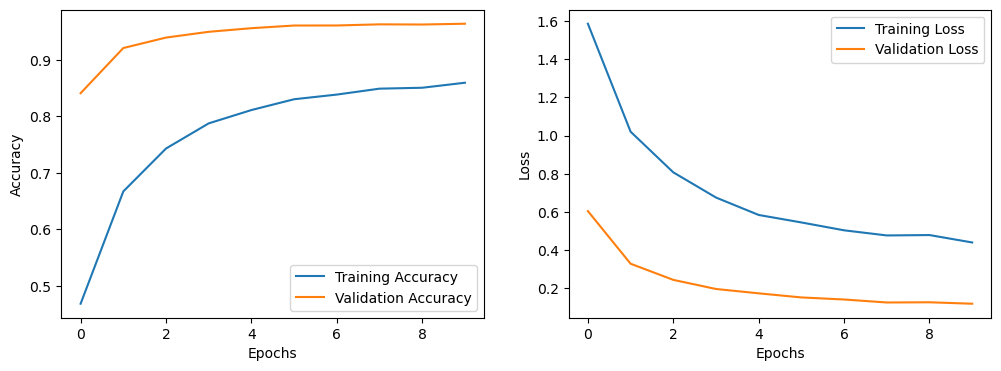

In [1]:
'''Ans 7:- This code builds and trains a Convolutional Neural Network
(CNN) for classifying handwritten digits from the MNIST dataset.
It simplifies the problem by using a smaller subset of data
(adjustable) to conserve memory. The code normalizes the data, defines
a compact CNN model, and utilizes data augmentation for
training. It tracks training history, evaluates the model's
accuracy, and plots training and validation performance metrics
(accuracy and loss) over epochs using matplotlib. The objective is
to achieve high accuracy while managing memory efficiently in
a limited dataset.'''

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Define a smaller subset of data for training (adjust this as needed)
subset_size = 5000
X_train = X_train[:subset_size]
y_train = y_train[:subset_size]

# Normalize and reshape data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define a simpler CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create data generators for memory-efficient training
batch_size = 32
train_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

# Train the model using data generators
history = model.fit(train_generator, steps_per_epoch=len(X_train) // batch_size, epochs=10, validation_data=(X_test, y_test))

# Evaluate and print accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 1s 975ms/step
Predictions for panther.png:
leopard: 0.93
jaguar: 0.01
cheetah: 0.00
cellular_telephone: 0.00
stove: 0.00


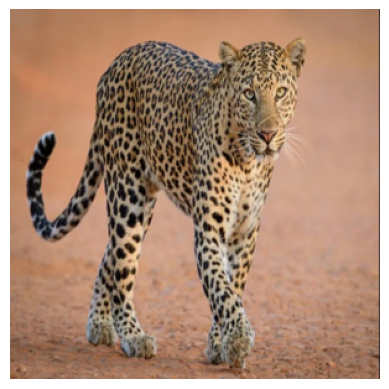

1/1 [==============================] - 0s 110ms/step
Predictions for husky.png:
Siberian_husky: 0.63
Eskimo_dog: 0.32
malamute: 0.02
dogsled: 0.00
timber_wolf: 0.00


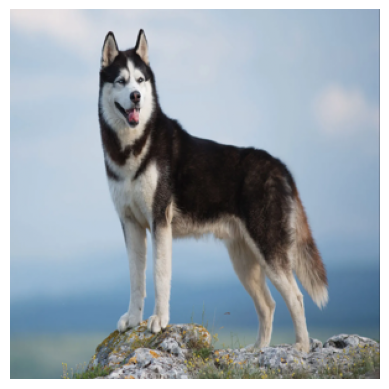

1/1 [==============================] - 0s 119ms/step
Predictions for bear.jpg:
sloth_bear: 0.94
American_black_bear: 0.00
dial_telephone: 0.00
siamang: 0.00
brown_bear: 0.00


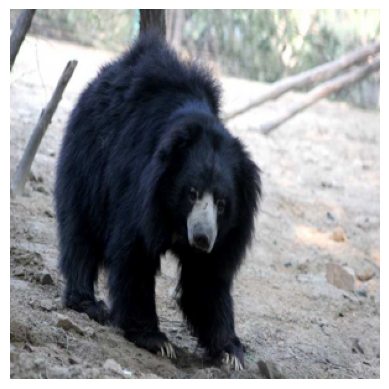

1/1 [==============================] - 0s 111ms/step
Predictions for tiger.jpg:
tiger: 0.66
tiger_cat: 0.27
zebra: 0.00
lion: 0.00
jaguar: 0.00


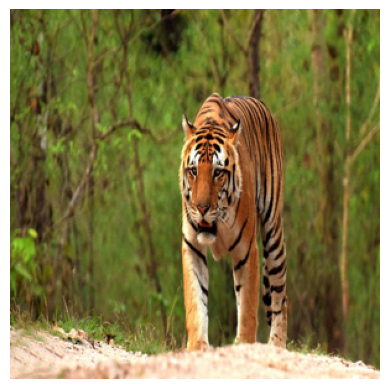

1/1 [==============================] - 0s 120ms/step
Predictions for forestcat.jpg:
grey_fox: 0.48
kit_fox: 0.05
lynx: 0.03
cougar: 0.02
Egyptian_cat: 0.02


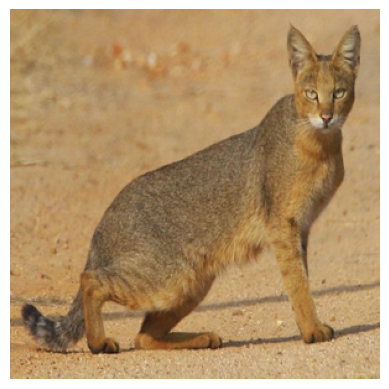

1/1 [==============================] - 0s 117ms/step
Predictions for peakock.jpg:
peacock: 0.95
European_gallinule: 0.00
drake: 0.00
fountain: 0.00
indigo_bunting: 0.00


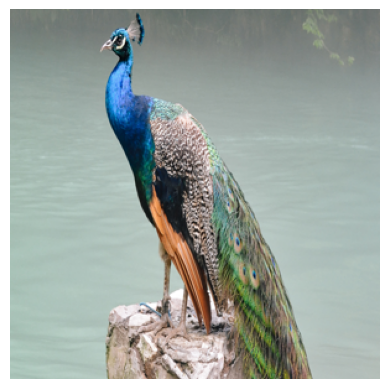

1/1 [==============================] - 0s 122ms/step
Predictions for labrador.jpg:
Labrador_retriever: 0.86
golden_retriever: 0.07
Rhodesian_ridgeback: 0.01
redbone: 0.01
Chesapeake_Bay_retriever: 0.00


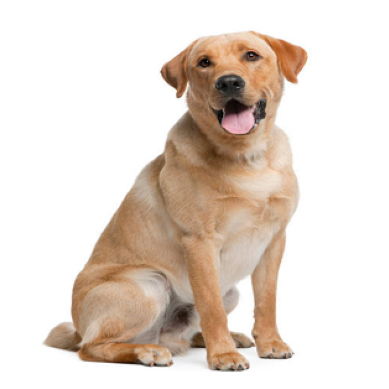

1/1 [==============================] - 0s 111ms/step
Predictions for elephant.jpg:
tusker: 0.58
African_elephant: 0.28
Indian_elephant: 0.05
ocarina: 0.00
triceratops: 0.00


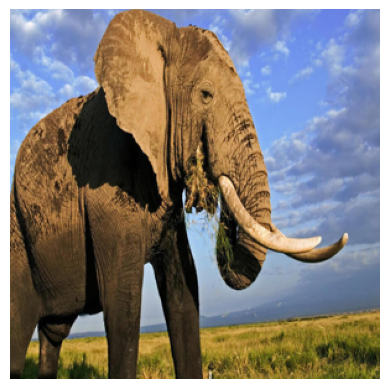

In [8]:
'''Ans 8:- This Python code utilizes the Inception v3 deep learning
model to classify animals in a list of images. It ensures that
the images have three RGB color channels and pixel values
ranging from -1.0 to 1.0. The code preprocesses and predicts each
image's animal class, displaying the top-5 predicted classes and
the denormalized image. This ensures accurate classification
of animals while meeting model input requirements.'''

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the Inception v3 model
model = InceptionV3(weights='imagenet')

# List of image paths
image_paths = ['panther.png',
               'husky.png',
               'bear.jpg',
               'tiger.jpg',
               'forestcat.jpg',
               'peakock.jpg',
               'labrador.jpg',
               'elephant.jpg']

# Iterate through each image
for img_path in image_paths:
    # check if (RGB)
    img = Image.open(img_path)
    img = img.convert('RGB')  
    img = img.resize((299, 299))
    
    # Convert to NumPy array
    img = np.array(img)
    
    # Normalize pixel values to range from -1.0 to 1.0
    img = img / 127.5 - 1.0  
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img)

    # Decode and print the top-5 predicted classes
    decoded_predictions = decode_predictions(predictions, top=5)[0]
    print(f"Predictions for {img_path}:")
    for _, label, score in decoded_predictions:
        print(f"{label}: {score:.2f}")

    # Display the image
    # Denormalize and display the image
    plt.imshow(img[0] / 2 + 0.5)
    plt.axis('off')
    plt.show()

a. Make a training set of at least 100 images for each class:-

In [17]:
'''Ans 9a:- To create a training set, we need to collect
or acquire images that belong to different classes. Each
class should have at least 100 images. These images should be
organized into directories where each directory represents a class,
and the images within each directory belong to that class. 

we can use the Flowers dataset, which is publicly available
and contains different flower categories.'''

import tensorflow as tf
import os

# Define the dataset directory path
dataset_dir = 'flowers'

# List the subdirectories (classes) in the dataset
classes = os.listdir(dataset_dir)
print("Classes:", classes)

Classes: ['class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']


In [18]:
'''9b:- Preprocessing involves preparing the images for
training. Resizing images to a consistent size (e.g., 299x299
pixels) and applying data augmentation techniques can help improve
the model's performance. Data augmentation includes operations
like random rotations, flips, and zooms to increase the
diversity of training samples. Here's how we can apply
preprocessing and data augmentation using TensorFlow and Keras:-'''

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size for InceptionV3
img_size = (299, 299)

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    # Use training subset for training
    subset='training')

Found 600 images belonging to 6 classes.


In [20]:
'''9c:- Transfer learning involves using a pre-trained model as a
starting point and fine-tuning it for a new task. In this case, we
will use the InceptionV3 model trained on a large dataset. we
freeze all layers up to the bottleneck layer (typically the last
layer before the output layer) and replace the output layer with
a new one suitable for our classification task. Here's how
to load the InceptionV3 model and modify it for our task'''

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

num_classes = 6

# Freeze layers up to the bottleneck layer
for layer in base_model.layers:
    layer.trainable = False

# Add a custom output layer for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [1]:
'''9d:- Splitting the data into training and test sets is
essential for evaluating the model's performance. The training set
is used for model training, while the test set is used for
evaluation to assess how well the model generalizes to unseen data. 
we can split our data using various methods, including random
splitting or using dedicated functions like train_test_split.'''

Found 600 images belonging to 6 classes.
Epoch 1/10
19/19 [==============================] - 44s 2s/step - loss: 2.3462 - accuracy: 0.3183
Epoch 2/10
19/19 [==============================] - 43s 2s/step - loss: 1.1797 - accuracy: 0.4467
Epoch 3/10
19/19 [==============================] - 43s 2s/step - loss: 1.1148 - accuracy: 0.4617
Epoch 4/10
19/19 [==============================] - 43s 2s/step - loss: 1.0728 - accuracy: 0.4867
Epoch 5/10
19/19 [==============================] - 43s 2s/step - loss: 1.0419 - accuracy: 0.5050
Epoch 6/10
19/19 [==============================] - 43s 2s/step - loss: 0.9975 - accuracy: 0.5133
Epoch 7/10
19/19 [==============================] - 44s 2s/step - loss: 0.9449 - accuracy: 0.5483
Epoch 8/10
19/19 [==============================] - 44s 2s/step - loss: 0.9591 - accuracy: 0.5367
Epoch 9/10
19/19 [==============================] - 43s 2s/step - loss: 0.9285 - accuracy: 0.5667
Epoch 10/10
19/19 [==============================] - 43s 2s/step - loss: 0.91

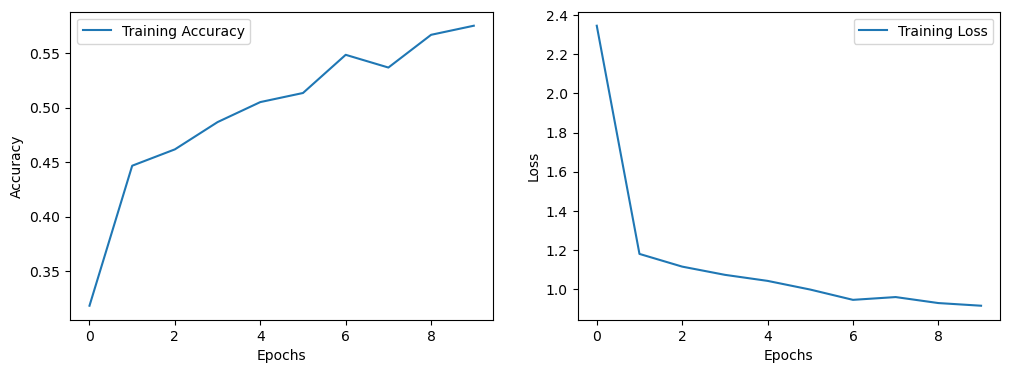

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define dataset directory
dataset_dir = 'flowers'

# Set image size for InceptionV3
img_size = (299, 299)
batch_size = 32
num_classes = 6  # Number of classes in our dataset

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multiple classes
    shuffle=True)  # Shuffle the training data

# Load InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Freeze layers up to the bottleneck layer
for layer in base_model.layers:
    layer.trainable = False

# Add a custom output layer for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10)

# Plot training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()